In [4]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))

In [52]:
path='/Users/stella/Desktop/'
date_0=datetime.date(2017,4,14)
date_1=datetime.date(2017,7,1)

In [109]:
# PEGASOR INDOOR AND OUTDOOR DATA
i_ldsa=pd.read_excel(path+'realeco_sn0135-ldsa_2017-01-23t181000_2017-07-01t181000.xlsx')
i_ldsa=i_ldsa.set_index('time')
i_pn=pd.read_excel(path+'realeco_sn0135-pm25_2017-01-19t181600_2017-07-01t181600.xlsx')
i_pn=i_pn.set_index('time')
i_pm25=pd.read_excel(path+'realeco_sn0135-pn_2017-01-25t183900_2017-07-01t183900.xlsx')
i_pm25=i_pm25.set_index('time')

i_df=(i_ldsa.join(i_pn)).join(i_pm25).dropna()
i_df.columns=['i-ldsa','i-pm25','i-pn']

urban=pd.read_csv(path+'1329_PEGASOR A_20170712185105-2.csv',delimiter=',')
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))
urban.columns=['time','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2']
urban['pn-1'].loc[:80034]=urban['pn-1'].loc[:80034]*6
urban['pn-2'].loc[:80033]=urban['pn-2'].loc[:80033]*6
urban=urban.set_index('time')

pegasor=i_df.join(urban).reset_index()

pegasor=pegasor[(pegasor['time']>date_0) & (pegasor['time']<date_1)]
pegasor=pegasor[pegasor>0].dropna().reset_index()
pegasor=pegasor.reset_index()
del pegasor['index']
del pegasor['level_0']

print("PEGASOR DATA: Indoor, Urban 1, Urban 2")
pegasor.head()

/Users/stella/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


PEGASOR DATA: Indoor, Urban 1, Urban 2


,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
0,2017-04-14 00:01:00,4.795126,1.010291,604.775,22.006,125985.840,0.864,21.477,124777.199,0.856
1,2017-04-14 00:02:00,4.784280,0.990642,609.095,22.006,125985.840,0.864,21.477,124777.199,0.856
2,2017-04-14 00:03:00,4.777046,0.963393,616.864,22.006,125985.840,0.864,21.520,124830.368,0.856
3,2017-04-14 00:04:00,4.775389,0.967302,615.184,21.834,125202.347,0.859,21.520,124830.368,0.856
4,2017-04-14 00:05:00,4.802154,0.950101,626.548,21.834,125202.347,0.859,20.943,121472.961,0.833


In [110]:
#april         3783
apr_3783=pd.read_excel(path+'queens-data/Queens Data Logger TSI 3783 Ultrafine February to April.xls')[1:-8]
apr_3783['Date&Time']=apr_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

#may-june      3783
may_jun_3783=pd.read_csv(path+'queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_3783 = may_jun_3783.rename(columns=may_jun_3783.iloc[1])
may_jun_3783 = may_jun_3783[3:]
may_jun_3783=may_jun_3783[['Date&Time','UF Aggregated Conc.']]
may_jun_3783['Date&Time']=may_jun_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

tsi_3783=pd.concat([apr_3783,may_jun_3783])

tsi_3783['UF Aggregated Conc.']=pd.to_numeric(tsi_3783['UF Aggregated Conc.'], errors='coerce')
tsi_3783=tsi_3783[(tsi_3783['Date&Time']>date_0) & (tsi_3783['Date&Time']<date_1)]
tsi_3783=tsi_3783.reset_index()
del tsi_3783['index']

tsi_3783.columns=['time','PN (#/cm3)']

print("TSI 3783 DATA")
tsi_3783.head()

TSI 3783 DATA


,time,PN (#/cm3)
0,2017-04-14 01:00:00,19788.0
1,2017-04-14 02:00:00,22831.0
2,2017-04-14 03:00:00,18965.0
3,2017-04-14 04:00:00,27698.0
4,2017-04-14 05:00:00,26877.0


In [ ]:
# TSI 3031 - 6 size bins
# ch1: 20–30 nm, ch2: 30–50 nm, ch3: 50–70 nm
# ch4: 70–100 nm, ch5: 100–200 nm, ch6: > 200 nm

In [55]:
#april         3031
apr_3031=pd.read_csv(path+'queens-data/TSI 3031 Particle Counter_20170413-april.TXT',delimiter='\t',skiprows=4)
apr_3031=apr_3031.reset_index()
apr_3031.columns=apr_3031.iloc[0]
apr_3031=apr_3031.iloc[1:].reset_index()
apr_3031['start']=apr_3031['start'].apply(lambda x: parse(x))
apr_3031['end']=apr_3031['end'].apply(lambda x: parse(x))
apr_3031=apr_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

#may-june      3031
may_jun_3031=pd.read_csv(path+'queens-data/TSI 3031_20170501.TXT',delimiter='\t',skiprows=4)
may_jun_3031=may_jun_3031.reset_index()
may_jun_3031.columns=may_jun_3031.iloc[0]
may_jun_3031=may_jun_3031.iloc[1:].reset_index()
may_jun_3031['start']=may_jun_3031['start'].apply(lambda x: parse(x))
may_jun_3031['end']=may_jun_3031['end'].apply(lambda x: parse(x))
may_jun_3031=may_jun_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

tsi_3031=pd.concat([apr_3031,may_jun_3031])

tsi_3031=tsi_3031[(tsi_3031['start']>date_0) & (tsi_3031['start']<date_1)]
tsi_3031=tsi_3031.reset_index()
del tsi_3031['index']
tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']] = tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']].apply(pd.to_numeric)

tsi_3031.head()

,start,end,ch1,ch2,ch3,ch4,ch5,ch6
0,2017-04-14 00:00:07,2017-04-14 00:14:37,3157.000,3619.000,1151.000,347.000,229.000,29.000
1,2017-04-14 00:15:07,2017-04-14 00:29:37,3559.000,3603.000,1051.000,306.000,240.000,23.000
2,2017-04-14 00:30:06,2017-04-14 00:44:36,3271.000,3502.000,1114.000,334.000,203.000,36.000
3,2017-04-14 00:45:07,2017-04-14 00:59:37,3399.000,3665.000,1178.000,354.000,218.000,33.000
4,2017-04-14 01:00:06,2017-04-14 01:14:36,3140.000,3575.000,1205.000,412.000,252.000,37.000


In [187]:
pegasor['ldsa-2'][6556], pegasor['ldsa-2'][6555], pegasor['ldsa-1'][6556], pegasor['ldsa-1'][6555]

(205.792, 30.866, 28.420999999999999, 29.933000000000003)

In [154]:
pegasor['u-diff']=pegasor['ldsa-1']-pegasor['ldsa-2']

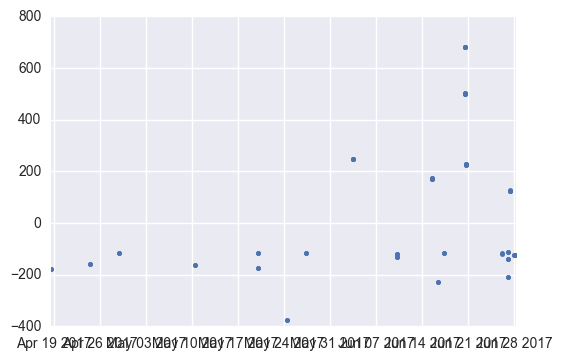

In [188]:
plt.plot(pegasor['time'][abs(pegasor['u-diff'])>100],pegasor['u-diff'][abs(pegasor['u-diff'])>100],'.')

In [252]:
pegasor[abs(pegasor['u-diff'])>50].head()

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,u-diff
502,2017-04-14 08:23:00,4.314662,1.004345,515.761,20.852,118857.681,0.815,76.760,442993.683,3.038,-55.908
503,2017-04-14 08:24:00,4.236945,0.974029,509.863,22.961,130979.019,0.898,76.760,442993.683,3.038,-53.799
748,2017-04-14 12:29:00,4.740606,1.492276,481.655,37.413,214009.354,1.468,96.739,563012.268,3.861,-59.326
749,2017-04-14 12:30:00,4.714092,1.497905,476.550,37.413,214009.354,1.468,96.739,563012.268,3.861,-59.326
4373,2017-04-17 00:34:00,4.676367,1.863119,418.523,17.866,102287.468,0.701,69.388,402555.115,2.760,-51.522


In [210]:
test=pegasor[abs(pegasor['u-diff'])<100]

In [213]:
pegasor[58410:58416]

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,u-diff
58410,2017-05-24 11:10:00,5.403116,4.023589,345.291,21.736,124978.447,0.857,23.926,138185.837,0.948,-2.190
58411,2017-05-24 11:11:00,5.481149,4.099157,349.473,21.736,124978.447,0.857,23.926,138185.837,0.948,-2.190
58412,2017-05-24 11:12:00,5.571045,4.173249,354.890,21.736,124978.447,0.857,397.081,2292523.682,15.720,-375.345
58413,2017-05-24 11:13:00,5.619026,4.245000,356.322,22.543,129408.295,0.887,397.081,2292523.682,15.720,-374.538
58414,2017-05-24 11:14:00,5.814018,4.422585,367.323,22.543,129408.295,0.887,23.905,137991.913,0.946,-1.362
58415,2017-05-24 11:15:00,5.807671,4.384883,368.399,22.543,129408.295,0.887,23.905,137991.913,0.946,-1.362


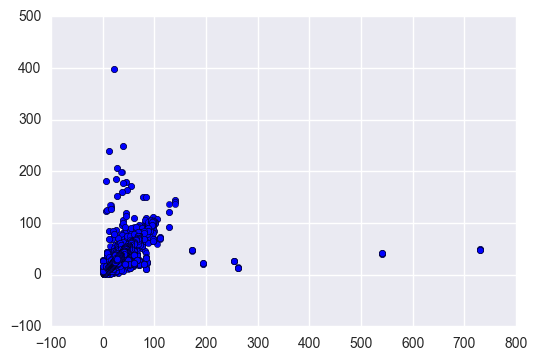

In [203]:
plt.scatter(test['ldsa-1'],test['ldsa-2'])

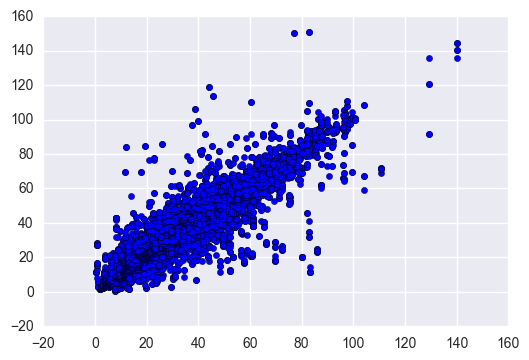

In [211]:
plt.scatter(test['ldsa-1'],test['ldsa-2'])

In [99]:
test=tsi_3783.join(pegasor).dropna()

In [100]:
test

,Date&Time,UF Aggregated Conc.,level_0,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
0,2017-04-14 01:00:00,19788.0,0,2017-04-14 00:01:00,4.795126,1.010291,604.775,22.006,125985.840,0.864,21.477,124777.199,0.856
1,2017-04-14 02:00:00,22831.0,1,2017-04-14 00:02:00,4.784280,0.990642,609.095,22.006,125985.840,0.864,21.477,124777.199,0.856
2,2017-04-14 03:00:00,18965.0,2,2017-04-14 00:03:00,4.777046,0.963393,616.864,22.006,125985.840,0.864,21.520,124830.368,0.856
3,2017-04-14 04:00:00,27698.0,3,2017-04-14 00:04:00,4.775389,0.967302,615.184,21.834,125202.347,0.859,21.520,124830.368,0.856
4,2017-04-14 05:00:00,26877.0,4,2017-04-14 00:05:00,4.802154,0.950101,626.548,21.834,125202.347,0.859,20.943,121472.961,0.833
5,2017-04-14 06:00:00,16828.0,5,2017-04-14 00:06:00,4.828062,0.967740,625.540,21.834,125202.347,0.859,20.943,121472.961,0.833
6,2017-04-14 07:00:00,15572.0,6,2017-04-14 00:07:00,4.772100,0.968483,614.138,21.834,125202.347,0.859,21.780,126222.336,0.865
7,2017-04-14 08:00:00,15028.0,7,2017-04-14 00:08:00,4.796766,0.972377,617.685,21.834,125202.347,0.859,21.780,126222.336,0.865
8,2017-04-14 09:00:00,13240.0,8,2017-04-14 00:09:00,4.823219,0.968553,624.256,22.198,127325.165,0.873,21.370,123651.436,0.848
9,2017-04-14 10:00:00,17160.0,9,2017-04-14 00:10:00,4.867651,0.982397,628.308,22.198,127325.165,0.873,21.370,123651.436,0.848


In [102]:
len(test)

88185

In [ ]:
df[(df > 0).all(1)]

In [232]:
ptest=pd.read_csv(path+'1329_PEGASOR A_20170925193225.csv')

In [233]:
ptest['DateTime']=ptest['DateTime'].apply(lambda x: parse(x))

In [234]:
ptest=ptest[(ptest>=0).all(1)]

In [235]:
ptest=ptest.reset_index()
del ptest['index']

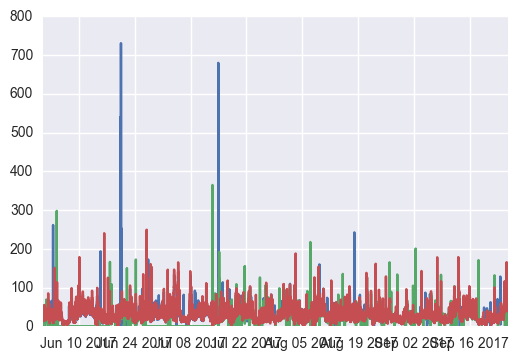

In [237]:
plt.plot(ptest['DateTime'],ptest['ldsa-1'])
plt.plot(ptest['DateTime'],ptest['ldsa-2'])
plt.plot(ptest['DateTime'],ptest['ldsa-3'])

In [238]:
ptest['udiff-13']=ptest['ldsa-1']-ptest['ldsa-3']

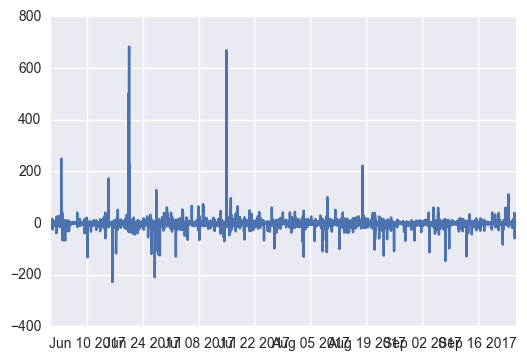

In [240]:
plt.plot(ptest['DateTime'],ptest['udiff-13'])

In [241]:
ptest['udiff-12']=ptest['ldsa-1']-ptest['ldsa-2']

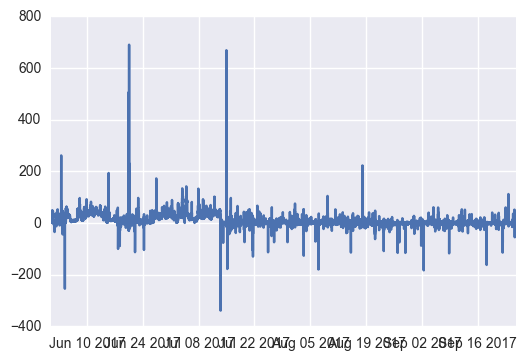

In [242]:
plt.plot(ptest['DateTime'],ptest['udiff-12'])

In [251]:
ptest[ptest['udiff-23']>100]

,DateTime,ldsa-1,pn-1,ldsa-2,pn-2,ldsa-3,pn-3,udiff-13,udiff-12,udiff-23
4972,2017-06-04 10:53:00,43.163,248737.152,297.724,1068480.591,46.109,266674.805,-2.946,-254.561,251.615
4973,2017-06-04 10:54:00,43.163,248737.152,297.724,1068480.591,46.109,266674.805,-2.946,-254.561,251.615
4976,2017-06-04 10:57:00,37.618,216771.683,140.289,504352.356,29.990,173940.048,7.628,-102.671,110.299
4977,2017-06-04 10:58:00,37.618,216771.683,140.289,504352.356,29.990,173940.048,7.628,-102.671,110.299
24165,2017-06-17 19:00:00,65.603,377413.788,166.079,614911.255,63.507,365669.617,2.096,-100.476,102.572
24166,2017-06-17 19:01:00,65.603,377413.788,166.079,614911.255,63.507,365669.617,2.096,-100.476,102.572
30275,2017-06-22 01:05:00,38.586,223523.361,150.083,553159.302,40.175,230941.650,-1.589,-111.497,109.908
30276,2017-06-22 01:06:00,36.934,214012.192,150.083,553159.302,40.561,232864.319,-3.627,-113.149,109.522
33499,2017-06-24 06:56:00,67.519,389502.106,172.081,628672.913,69.710,401288.666,-2.191,-104.562,102.371
61051,2017-07-13 12:10:00,25.269,151830.734,364.604,2164716.553,65.360,401072.784,-40.091,-339.335,299.244


In [245]:
ptest[63135:63145]

,DateTime,ldsa-1,pn-1,ldsa-2,pn-2,ldsa-3,pn-3,udiff-13,udiff-12,udiff-23
63135,2017-07-14 22:56:00,10.642,64474.236,11.376,68134.079,11.579,71821.220,-0.937,-0.734,-0.203
63136,2017-07-14 22:57:00,10.642,64474.236,11.376,68134.079,11.579,71821.220,-0.937,-0.734,-0.203
63137,2017-07-14 22:58:00,679.733,4124768.555,11.291,67486.275,11.378,70425.591,668.355,668.442,-0.087
63138,2017-07-14 22:59:00,679.733,4124768.555,11.291,67486.275,11.378,70425.591,668.355,668.442,-0.087
63139,2017-07-14 23:00:00,679.733,4124768.555,11.839,70675.339,11.985,74094.093,667.748,667.894,-0.146
63140,2017-07-14 23:01:00,679.733,4124768.555,11.839,70675.339,11.985,74094.093,667.748,667.894,-0.146
63141,2017-07-14 23:02:00,679.733,4124768.555,11.197,66969.086,11.340,70240.128,668.393,668.536,-0.143
63142,2017-07-14 23:13:00,9.124,55432.228,11.505,68849.716,11.679,72381.401,-2.555,-2.381,-0.174
63143,2017-07-14 23:14:00,9.124,55432.228,11.970,71498.672,12.102,74863.548,-2.978,-2.846,-0.132
63144,2017-07-14 23:15:00,9.124,55432.228,11.970,71498.672,12.102,74863.548,-2.978,-2.846,-0.132


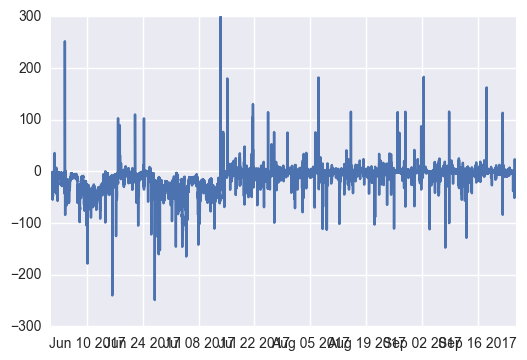

In [243]:
ptest['udiff-23']=ptest['ldsa-2']-ptest['ldsa-3']
plt.plot(ptest['DateTime'],ptest['udiff-23'])